In [1]:
from util import load_synthesized_data, plot_df

df_data = load_synthesized_data()
plot_df(df_data)

In [2]:
TRAIN_VAL_SPLIT = 1000

def validate(df_forecast):
    diff = df_forecast['y'] - df_forecast['y_hat']
    mse = (diff**2).mean()
    mae = diff.abs().mean()
    print("MSE: {}, MAE: {}".format(mse, mae))
    plot_df(df_forecast, columns=['y', 'y_hat'])

## Naive method

In [3]:
def naive_forecast(df_data):
    df_data = df_data.copy()
    df_data['y_hat'] = df_data['y'].shift(1)
    return df_data

MSE: 61.82753366856369, MAE: 5.9379085153216735


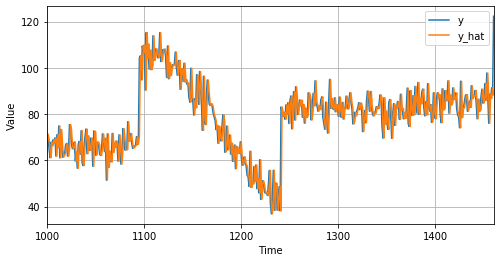

In [4]:
df_naive_forecast = naive_forecast(df_data)
df_naive_forecast = df_naive_forecast[TRAIN_VAL_SPLIT:]
validate(df_naive_forecast)

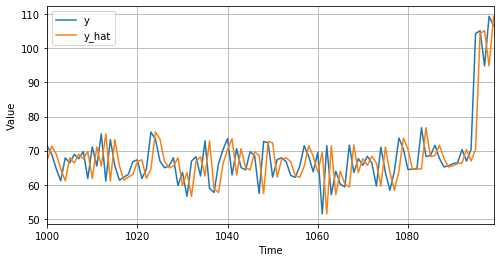

In [5]:
plot_df(df_naive_forecast[:100])

## Moving average

In [6]:
def moving_average_forecast(df_data, forecast_col='y', window=30):
    df_data = df_data.copy()
    df_data[forecast_col + '_hat'] = df_data[forecast_col].rolling(window).mean().shift(1)
    return df_data

MSE: 106.67456651431154, MAE: 7.142418570620877


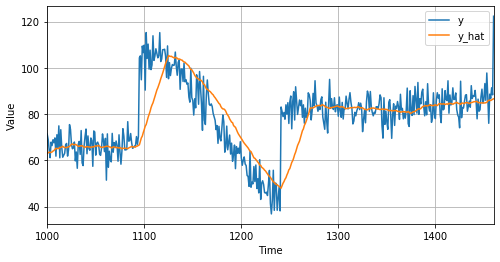

In [7]:
df_ma_forecast = moving_average_forecast(df_data, window=30)
df_ma_forecast = df_ma_forecast[TRAIN_VAL_SPLIT:]
validate(df_ma_forecast)

## Moving average on differential value

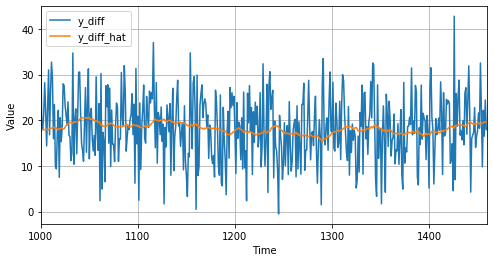

In [8]:
df_diff_ma = df_data.copy()
df_diff_ma['y_diff'] = df_diff_ma['y'].diff(365)
df_diff_ma = moving_average_forecast(df_diff_ma, 'y_diff', 50)
plot_df(df_diff_ma[TRAIN_VAL_SPLIT:], columns=['y_diff', 'y_diff_hat'])

MSE: 52.97365999969187, MAE: 5.839310562995895


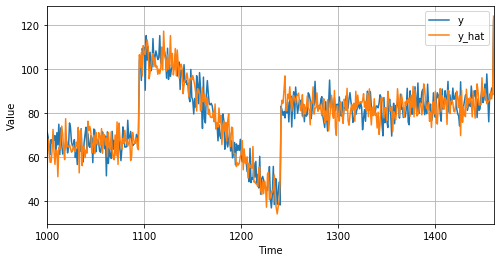

In [9]:
df_diff_ma['y_hat'] = df_diff_ma['y'].shift(365) + df_diff_ma['y_diff_hat']
df_diff_ma = df_diff_ma[TRAIN_VAL_SPLIT:]
validate(df_diff_ma)

MSE: 33.45226092870013, MAE: 4.569441847863211


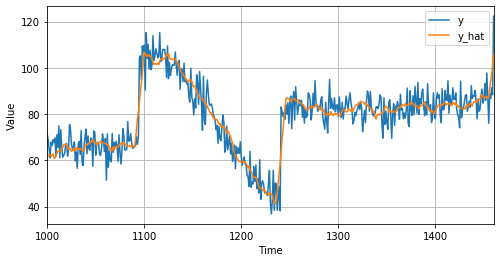

In [10]:
df_ma_forecast = moving_average_forecast(df_data[TRAIN_VAL_SPLIT - 370:-360], window=10)
df_smooth_forecast = df_diff_ma.copy()
df_smooth_forecast['y_hat'] = df_ma_forecast.iloc[10:, df_ma_forecast.columns.get_loc('y_hat')].values + df_smooth_forecast['y_diff_hat']
validate(df_smooth_forecast)